In [2]:
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm

In [4]:
TRAIN_DIR = 'J:/SONGS/LAP DOWNLOAD/GEETA/Compressed/Data of saudia/Data of saudia'
TEST_DIR = 'J:/SONGS/LAP DOWNLOAD/GEETA/Compressed/Data of saudia/tes'
IMG_SIZE = 50
LR = 1e-3
 
 
'''Setting up the model which will help with tensorflow models'''
MODEL_NAME = 'Autistic-{}-{}.model'.format(LR, '6conv-basic')

In [5]:
def label_img(img):
    word_label = img.split('.')#[-3]
    s=word_label[0]
 # DIY One hot encoder
    if 'happy' in s : 
        return [1, 0, 0]
    elif 'sad' in  s: 
        return [0, 1, 0]
    elif 'Angry' in  s: 
        return [0, 0, 1]   

In [6]:
def create_train_data():
    # Creating an empty list where we should the store the training data
    # after a little preprocessing of the data
    training_data = []
 
    # tqdm is only used for interactive loading
    # loading the training data
    for img in tqdm(os.listdir(TRAIN_DIR)):
 
        # labeling the images
        label = label_img(img)
 
        path = os.path.join(TRAIN_DIR, img)
 
        # loading the image from the path and then converting them into
        # greyscale for easier covnet prob
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 
        # resizing the image for processing them in the covnet
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
 
        # final step-forming the training data list with numpy array of the images
        training_data.append([np.array(img), np.array(label)])
 
    # shuffling of the training data to preserve the random state of our data
    shuffle(training_data)
 
    # saving our trained data for further uses if required
    np.save('train_data.npy', training_data)
    return training_data
 

In [7]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
         
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data
 

In [8]:
'''Running the training and the testing in the dataset for our model'''
train_data = create_train_data()
test_data = process_test_data()
 

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 66.62it/s]


In [14]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
 
import tensorflow as tf
tf.reset_default_graph()
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input')
 
convnet = conv_2d(convnet, 32, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = conv_2d(convnet, 64, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = conv_2d(convnet, 128, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = conv_2d(convnet, 64, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = conv_2d(convnet, 32, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = fully_connected(convnet, 1024, activation ='relu')
convnet = dropout(convnet, 0.8)
 
convnet = fully_connected(convnet, 3, activation ='softmax')
convnet = regression(convnet, optimizer ='adam', learning_rate = LR,
      loss ='categorical_crossentropy', name ='targets')
 
model = tflearn.DNN(convnet, tensorboard_dir ='log')

In [15]:
# Splitting the testing data and training data
train = train_data
test = train_data

In [16]:
# X-Features & Y-Labels
 
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = [i[1] for i in test]

In [20]:
model.fit({'input': X}, {'targets': Y}, n_epoch = 50, 
    validation_set =({'input': test_x}, {'targets': test_y}), 
    snapshot_step = 2000, show_metric = True, run_id = MODEL_NAME)
model.save(MODEL_NAME)

---------------------------------
Run id: Autistic-0.001-6conv-basic.model
Log directory: log/
---------------------------------
Training samples: 27
Validation samples: 27
--
Training Step: 26  | total loss: 0.93983 | time: 1.305s
| Adam | epoch: 026 | loss: 0.93983 - acc: 0.6309 | val_loss: 0.78500 - val_acc: 0.7407 -- iter: 27/27
--
Training Step: 27  | total loss: 0.97870 | time: 1.125s
| Adam | epoch: 027 | loss: 0.97870 - acc: 0.5829 | val_loss: 0.73946 - val_acc: 0.7407 -- iter: 27/27
--
Training Step: 28  | total loss: 0.93064 | time: 1.134s
| Adam | epoch: 028 | loss: 0.93064 - acc: 0.6224 | val_loss: 0.67522 - val_acc: 0.7407 -- iter: 27/27
--
Training Step: 29  | total loss: 0.88420 | time: 1.128s
| Adam | epoch: 029 | loss: 0.88420 - acc: 0.6512 | val_loss: 0.64292 - val_acc: 0.7407 -- iter: 27/27
--
Training Step: 30  | total loss: 0.93143 | time: 1.121s
| Adam | epoch: 030 | loss: 0.93143 - acc: 0.5934 | val_loss: 0.71629 - val_acc: 0.8889 -- iter: 27/27
--
Training Step:

INFO:tensorflow:C:\Users\DELL\Autistic-0.001-6conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


0


2


2


2


0


0


0




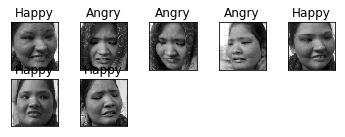

In [32]:
'''Testing the data'''
import matplotlib.pyplot as plt
# if you need to create the data:
# test_data = process_test_data()
# if you already have some saved:
test_data = np.load('test_data.npy')
 
fig = plt.figure()
 
for num, data in enumerate(test_data[:7]):
    # cat: [1, 0]
    # dog: [0, 1]
     
    img_num = data[1]
    img_data = data[0]
     
    y = fig.add_subplot(4, 5, num + 1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
 
    # model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    print(np.argmax(model_out))
    if np.argmax(model_out) == 0:
        str_label ='Happy'
    elif np.argmax(model_out) == 1:
        str_label ='sad'
    elif np.argmax(model_out) == 2:
        str_label ='Angry'
    
         
    y.imshow(orig, cmap ='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    print('\n')
plt.show()